In [1]:
from keras.layers import Input, Dense
from keras.models import Model
import matplotlib.pyplot as plt

In [2]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

In [3]:
# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
encoded = Dense(128, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

In [4]:
from keras.datasets import fashion_mnist
import numpy as np
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [5]:
#introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

In [6]:
history = autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))

Epoch 1/10
235/235 [==============================] - 1s 6ms/step - loss: 0.6961 - accuracy: 0.0017 - val_loss: 0.6960 - val_accuracy: 0.0010
Epoch 2/10
235/235 [==============================] - 1s 5ms/step - loss: 0.6958 - accuracy: 0.0018 - val_loss: 0.6957 - val_accuracy: 0.0010
Epoch 3/10
235/235 [==============================] - 1s 5ms/step - loss: 0.6956 - accuracy: 0.0019 - val_loss: 0.6955 - val_accuracy: 0.0010
Epoch 4/10
235/235 [==============================] - 1s 5ms/step - loss: 0.6954 - accuracy: 0.0019 - val_loss: 0.6952 - val_accuracy: 0.0010
Epoch 5/10
235/235 [==============================] - 1s 5ms/step - loss: 0.6951 - accuracy: 0.0020 - val_loss: 0.6950 - val_accuracy: 0.0011
Epoch 6/10
235/235 [==============================] - 1s 5ms/step - loss: 0.6949 - accuracy: 0.0020 - val_loss: 0.6948 - val_accuracy: 0.0010
Epoch 7/10
235/235 [==============================] - 2s 6ms/step - loss: 0.6947 - accuracy: 0.0020 - val_loss: 0.6946 - val_accuracy: 0.0011
Epoch 

In [7]:
print(autoencoder.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               4224      
_________________________________________________________________
dense_3 (Dense)              (None, 784)               101136    
Total params: 130,480
Trainable params: 130,480
Non-trainable params: 0
_________________________________________________________________
None


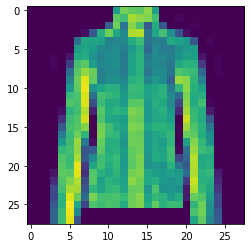

In [8]:
plt.imshow(x_test[57].reshape(28,28))

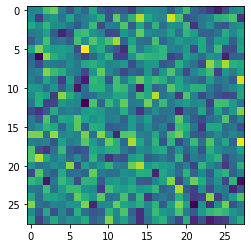

In [9]:
decoded_imgs = autoencoder.predict(x_test)
plt.imshow(decoded_imgs[57].reshape(28, 28))

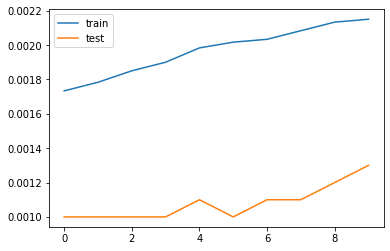

In [10]:
##ACCURACY
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'test'], loc='upper left')
plt.show()

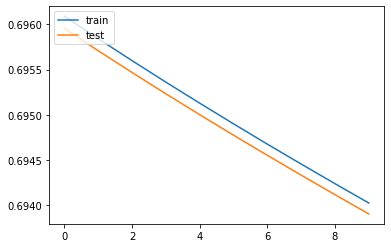

In [11]:
## LOSS
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'test'], loc='upper left')
plt.show()